In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [192]:
import os

#print (os.listdir('/content/gdrive/My Drive/MILIZE/'))
print (os.listdir('/content/gdrive/My Drive/MILIZE/Semantic/voc2012/'))
print (os.listdir('/content/gdrive/My Drive/MILIZE/Semantic/voc2012/voc2012/'))

['train.txt', 'voc2012', 'list_12.csv', 'list_15.csv', 'u_net_vgg16_voc2012_v2.ipynb', 'u_net_vgg16_voc2012.ipynb']
['class', 'img']


Library

In [0]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

from PIL import Image

from sklearn.model_selection import train_test_split

from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Input, Dropout, Conv2D, Conv2DTranspose
from keras.layers import concatenate

from keras.callbacks import EarlyStopping

Using TensorFlow backend.


Get data

In [0]:
path_train = '/content/gdrive/My Drive/MILIZE/Semantic/voc2012/'
path_img = '/content/gdrive/My Drive/MILIZE/Semantic/voc2012/voc2012/img/'
path_class = '/content/gdrive/My Drive/MILIZE/Semantic/voc2012/voc2012/class/'

In [0]:
df_train = pd.read_table(path_train+'train.txt', header=None, names=('A'))

print (df_train.shape)
df_train.head()

(1464, 1)


,A
0,2007_000032
1,2007_000039
2,2007_000063
3,2007_000068
4,2007_000121


shape:  (256, 256, 3)


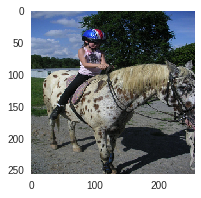

In [0]:
idx = np.random.randint(len(df_train))

file_name = df_train['A'][idx]
#file_name = '2008_003480'

size = 256

img_pil = Image.open(path_img+file_name+'.jpg').resize((size, size))
img_np = np.array(img_pil)

print ('shape: ', img_np.shape)

plt.figure(figsize=(5, 3))
plt.imshow(img_np)
plt.grid(False)
plt.show()

mode of class_pil:  P
mode of class_pil_rgb:  RGB
(256, 3)
shape:  (256, 256)
shape:  (256, 256, 3)


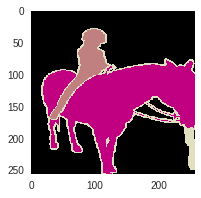

In [0]:
class_pil = Image.open(path_class+file_name+'.png').resize((size, size))
print ('mode of class_pil: ', class_pil.mode)

class_pil_rgb = class_pil.convert('RGB')
print ('mode of class_pil_rgb: ', class_pil_rgb.mode)

palette = class_pil.getpalette()
palette = np.array(palette).reshape(-1, 3)
print(palette.shape)  # (256, 3)

class_np = np.array(class_pil)
print ('shape: ', class_np.shape)
#print (class_np[120])

class_np_rgb = np.array(class_pil_rgb)
print ('shape: ', class_np_rgb.shape)


plt.figure(figsize=(5, 3))
plt.imshow(class_np_rgb)
plt.grid(False)
plt.show()

beforehand data reading 

In [0]:
#%%time

#x = []
#y = []
#size = 256

#for file_name in tqdm(df_train['A']):
#for file_name in tqdm(df_train['A'][:1000]):

#  img_pil = Image.open(path_img+file_name+'.jpg').resize((size, size))
#  img_np = np.array(img_pil)
#  x.append(img_np)
  
#  class_pil = Image.open(path_class+file_name+'.png').resize((size, size))
#  class_np = np.array(class_pil)
#  y.append(class_np)

In [0]:
#class_0 = Image.open(path_class+df_train['A'][0]+'.png')
#palette = class_0.getpalette()

#print (palette[:9])

In [0]:
#del df_train

Create training data

step by step

In [0]:
#x = np.array(x)
#y = np.array(y)

#print ('shape of x: ', x.shape)
#print ('shape of y: ', y.shape)

#print (y[0, 250, 100:150, 0])

In [0]:
#%%time

#n_classes = 22

#y_list = []

#y_temp = y[:500]
#y_m_temp = np.where(y_temp==255, n_classes-1, y_temp)
#y_oh_temp = np.identity(n_classes)[y_m_temp]

#y_list.append(y_oh_temp)
#del y_temp, y_m_temp, y_oh_temp

#print (np.array(y_list).shape)

In [0]:
#%%time

#y_temp = y[500:1000]
#y_m_temp = np.where(y_temp==255, n_classes-1, y_temp)
#y_oh_temp = np.identity(n_classes)[y_m_temp]

#y_list.append(y_oh_temp)
#del y_temp, y_m_temp, y_oh_temp

#print (np.array(y_list).shape)

In [0]:
#%%time

#y_temp = y[1000:]
#y_m_temp = np.where(y_temp==255, n_classes-1, y_temp)
#y_oh_temp = np.identity(n_classes)[y_m_temp]

#y_list.append(y_oh_temp)
#del y_temp, y_m_temp, y_oh_temp

#print (np.array(y_list).shape)

generator

In [0]:
#x = np.array(x)
#y = np.array(y)

#print ('shape of x: ', x.shape)
#print ('shape of y: ', y.shape)

#print (y[0, 250, 100:150, 0])

In [0]:
#def generator_y(y, n_classes):
#  for idx in range(len(y)):
#    y_m = np.where(y[idx]==255, n_classes-1, y[idx])
#    y_oh = np.identity(n_classes)[y_m]
#    yield y_oh

In [0]:
#n_classes = 22
#gen = generator_y(y, n_classes)

#y_oh_list = []
#for y_oh in tqdm(gen):
#  y_oh_list.append(y_oh)

#y_oh = np.array(y_oh_list)  
#print (y_oh.shape)  

In [0]:
# one time

#n_classes = 22

#y_m = np.where(y==255, n_classes-1, y)
#y_oh = np.identity(n_classes)[y_m]

#print ('shape of y_oh: ', y_oh.shape)

In [0]:
#x_data = x / 255.0
#y_data = y_oh

#x_train, x_valid, y_train, y_valid = train_test_split(x_data, y_data, 
#                                                     test_size=0.3, random_state=100)

#print ('shape of x_train: ', x_train.shape)
#print ('shape of y_train: ', y_train.shape)
#print ('shape of x_valid: ', x_valid.shape)
#print ('shape of y_valid: ', y_valid.shape)

In [0]:
#del df_train, x, y 
#del y_oh

In [0]:
#idx = np.random.randint(len(x_train))

#fig = plt.figure(figsize = (5, 3))
#ax1 = fig.add_subplot(1, 2, 1)
#ax1.imshow(x_train[idx])
#ax1.set_title('Image')
#ax1.set_axis_off()

#y_train[idx] = np.where(y_train[idx]==n_classes-1, 255, y_train[idx])
#temp = np.argmax(y_train[idx], axis=-1)
#pil_img = Image.fromarray(temp, mode='P')
#pil_img.putpalette(palette)
#np_img = np.array(pil_img)

#ax2 = fig.add_subplot(1, 2, 2)
#ax2.imshow(np_img)
#ax2.set_title('Mask')
#ax2.set_axis_off()

#plt.show()

Index color

(256, 256)


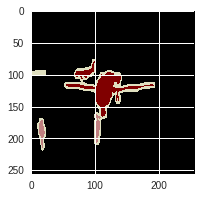

In [0]:
temp_pil = Image.open(path_class+df_train['A'][0]+'.png').resize((256, 256))
palette = temp_pil.getpalette()

temp = np.array(temp_pil)
print (temp.shape)

pil_img = Image.fromarray(temp, mode='P')
pil_img.putpalette(palette)
#pil_img

pil_img_rgb = pil_img.convert('RGB')
#pil_img_rgb

plt.figure(figsize=(5, 3))
plt.imshow(np.array(pil_img_rgb))
plt.show()

generator 2

In [0]:
file_list = df_train['A'].values
print (file_list.shape)
print (file_list[:3])

(1464,)
['2007_000032' '2007_000039' '2007_000063']


In [0]:
list_train, list_test = train_test_split(file_list, test_size=0.3, random_state=100)

print ('shape of list_train: ', list_train.shape)
print ('shape of list_test: ', list_test.shape)

shape of list_train:  (1024,)
shape of list_test:  (440,)


In [0]:
def batch_iter(data, n_classes, img_size, batch_size, shuffle=True):
  num_batches_per_epoch = int((len(data) - 1) / batch_size) + 1

  def data_generator():
    data_size = len(data)
    while True:
      # Shuffle the data at each epoch
      if shuffle:
        shuffle_indices = np.random.permutation(np.arange(data_size))
        shuffled_data = data[shuffle_indices]
      else:
        shuffled_data = data
      
      for batch_num in range(num_batches_per_epoch):
        start_index = batch_num * batch_size
        end_index = min((batch_num + 1) * batch_size, data_size)
        batch_list = shuffled_data[start_index: end_index] 
        
        x = []
        y = []
        
        for file_name in batch_list:
          img_pil = Image.open(path_img+file_name+'.jpg').resize((img_size, img_size))
          img_np = np.array(img_pil)
          x.append(img_np)
          
          class_pil = Image.open(path_class+file_name+'.png').resize((img_size, img_size))
          class_np = np.array(class_pil)
          y.append(class_np)
        
        x = np.array(x) / 255.
        y = np.array(y)
        y_m = np.where(y==255, n_classes-1, y)
        y_oh = np.identity(n_classes)[y_m]
        
        yield x, y_oh
      
  return num_batches_per_epoch, data_generator()

In [0]:
n_classes = 22
img_size = 256
batch_size = 32

train_steps, train_batches = batch_iter(list_train, n_classes, img_size, batch_size)
valid_steps, valid_batches = batch_iter(list_test, n_classes, img_size, batch_size)

print (train_steps)
print (train_batches)
print (valid_steps)
print (valid_batches)

32
<generator object batch_iter.<locals>.data_generator at 0x7f5293936bf8>
14
<generator object batch_iter.<locals>.data_generator at 0x7f5293936938>


Model

In [0]:
img_width = img_size
img_height = img_size

input_tensor = Input(shape=(img_width, img_height, 3))
    
vgg_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)

In [0]:
#vgg_model.summary()

In [0]:
vgg_top = vgg_model.get_layer('block5_conv2').output

block1_conv2 = vgg_model.get_layer('block1_conv2').output
block2_conv2 = vgg_model.get_layer('block2_conv2').output
block3_conv3 = vgg_model.get_layer('block3_conv3').output
block4_conv3 = vgg_model.get_layer('block4_conv3').output

In [0]:
n_classes = 22
start_neurons = 64

# 8 -> 16
deconv4 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding='same')(vgg_top)
uconv4 = concatenate([deconv4, block4_conv3])
uconv4 = Dropout(0.5)(uconv4)
uconv4 = Conv2D(start_neurons * 8, (3, 3), activation='relu', padding='same')(uconv4)
#uconv4 = Conv2D(start_neurons * 8, (3, 3), activation='relu', padding='same')(uconv4)

# 16 -> 32
deconv3 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(uconv4)
uconv3 = concatenate([deconv3, block3_conv3])
uconv3 = Dropout(0.5)(uconv3)
uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)
#uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)

# 32 -> 64
deconv2 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv3)
uconv2 = concatenate([deconv2, block2_conv2])
uconv2 = Dropout(0.5)(uconv2)
uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)
#uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)

# 64 -> 128
deconv1 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv2)
uconv1 = concatenate([deconv1, block1_conv2])
uconv1 = Dropout(0.5)(uconv1)
uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)
#uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)

#out = Conv2D(n_classes, (1,1), padding="same", activation="sigmoid")(uconv1)
out = Conv2D(n_classes, (1,1), padding="same", activation="softmax")(uconv1)

model = Model(inputs=input_tensor, outputs=out)

#for layer in model.layers[:17]:
#    layer.trainable = False
    
for layer in vgg_model.layers:
    layer.trainable = False    

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 256, 256, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 256, 256, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 128, 128, 64) 0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [0]:
early_stopping = EarlyStopping(monitor='val_acc', patience=3, mode='max', 
                              verbose=1)

In [0]:
epochs = 3
history = model.fit_generator(train_batches, train_steps, epochs=epochs,
                              validation_data=valid_batches, 
                              validation_steps=valid_steps, 
                              callbacks=[early_stopping],
                              verbose=1)

Epoch 1/3
32/32 [==============================] - 727s 23s/step - loss: 2.1284 - acc: 0.6312 - val_loss: 1.3886 - val_acc: 0.6860
Epoch 2/3
32/32 [==============================] - 109s 3s/step - loss: 1.3854 - acc: 0.6872 - val_loss: 1.3042 - val_acc: 0.6864
Epoch 3/3
32/32 [==============================] - 109s 3s/step - loss: 1.2962 - acc: 0.6962 - val_loss: 1.2691 - val_acc: 0.6919


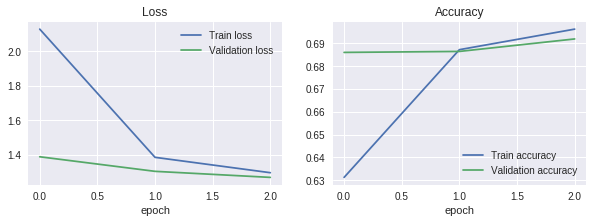

In [0]:
fig, (ax_loss, ax_acc) = plt.subplots(1, 2, figsize=(10, 3))
ax_loss.plot(history.epoch, history.history["loss"], label="Train loss")
ax_loss.plot(history.epoch, history.history["val_loss"], label="Validation loss")
ax_loss.set_title('Loss')
ax_loss.set_xlabel('epoch')
ax_loss.legend(loc='best')

ax_acc.plot(history.epoch, history.history["acc"], label="Train accuracy")
ax_acc.plot(history.epoch, history.history["val_acc"], label="Validation accuracy")
ax_acc.set_title('Accuracy')
ax_acc.set_xlabel('epoch')
ax_acc.legend(loc='best')
plt.show()

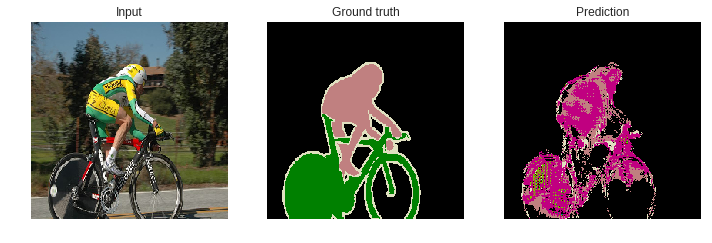

In [433]:
idx = np.random.randint(len(list_train))
file_name = list_train[idx]

#idx = np.random.randint(len(list_test))
#file_name = list_test[idx]

img_pil = Image.open(path_img+file_name+'.jpg').resize((img_size, img_size))
img_np = np.array(img_pil)

class_pil = Image.open(path_class+file_name+'.png').resize((img_size, img_size))
palette = class_pil.getpalette()
class_pil_rgb = class_pil.convert('RGB')
class_np = np.array(class_pil_rgb)

x = np.expand_dims(img_np, axis=0)
y = np.array(class_pil)

y_pred = np.copy(y)
y_pred[:, :] = np.squeeze(np.argmax(model.predict(x), axis=-1))[:, :]
y_pred = np.where(y_pred==n_classes-1, 255, y_pred)
y_img_pred = Image.fromarray(y_pred, mode='P')
y_img_pred.putpalette(palette)
y_img_pred_rgb = y_img_pred.convert('RGB')

fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(img_np)
ax1.set_title('Input')
ax1.set_axis_off()

ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(class_np)
ax2.set_title('Ground truth')
ax2.set_axis_off()

ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(y_img_pred_rgb)
ax3.set_title('Prediction')
ax3.set_axis_off()

plt.show()

In [328]:
print (y[150, 50:150])
print (y_pred[150, 50:150])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 255 255 255  13  13  13  13  13  13  13  13  13  13  13  13  13
  13  13  13  13  13  13  13  13  13  13  13  13  13  13  13  13  13  13
  13  13  13  13  13  13  13  13  13  13]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 15  0 15  0 15 15 15 15 15 15 15 15
 15 15 15 13 13 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15  0]


for checking

In [0]:
#palette = class_pil.getpalette()
#print(np.array(palette).reshape(-1, 3).shape)  # (256, 3)

#class_np_temp = np.array(class_pil)
#class_np_temp = np.where(class_np_temp==255, n_classes-1, class_np_temp)

#class_pil_temp = Image.fromarray(class_np_temp, mode='P')
#palette_2 = class_pil_temp.getpalette()
#print(np.array(palette_2).reshape(-1, 3).shape) 

In [251]:
x = np.expand_dims(img_np, axis=0)
y = np.array(class_pil)

y_pred = np.copy(y)
y_pred[:, :] = np.squeeze(np.argmax(model.predict(x), axis=-1))[:, :]
y_pred = np.where(y_pred==n_classes-1, 255, y_pred)

y_pred_2 = np.squeeze(np.argmax(model.predict(x), axis=-1))
y_pred_2 = np.where(y_pred_2==n_classes-1, 255, y_pred_2)

print (y.shape)
print (y_pred.shape)
print (y_pred_2.shape)

print (np.sum((y_pred==y_pred_2).astype(int))/256**2)

(256, 256)
(256, 256)
(256, 256)
1.0


In [252]:
#a = 120
#b = 0

#print (y[a, b:b+50])
#print (y_pred[a, b:b+50])
#print ((y==y_pred)[a, b:b+50])

print ('# of common pixels: ', np.sum((y==y_pred).astype(int)))
print ('%: ', np.sum((y==y_pred).astype(int)) / 256**2 * 100)
print ()
print ('# of 0 (truth): ', np.sum((y==0).astype(int)))
print ('%: ', np.sum((y==0).astype(int))/256**2)


# of common pixels:  50068
%:  76.397705078125

# of 0 (truth):  50701
%:  0.7736358642578125


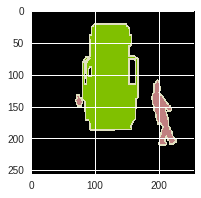

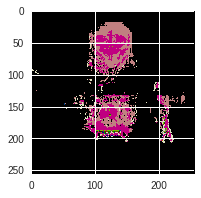

In [253]:
y_img = Image.fromarray(y, mode='P')
y_img.putpalette(palette)
y_img_rgb = y_img.convert('RGB')

plt.figure(figsize=(5, 3))
plt.imshow(np.array(y_img_rgb))
plt.show()

y_img_pred = Image.fromarray(y_pred, mode='P')
y_img_pred.putpalette(palette)
y_img_pred_rgb = y_img_pred.convert('RGB')

plt.figure(figsize=(5, 3))
plt.imshow(np.array(y_img_pred_rgb))
plt.show()

In [236]:
x, y = next(train_batches)

print (x.shape)
print (y.shape)

(32, 256, 256, 3)
(32, 256, 256, 22)


In [237]:
y_pred = model.predict(x)

print (y.shape)

(32, 256, 256, 22)


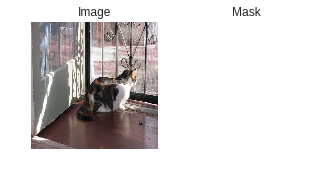

In [235]:
idx = 0

fig = plt.figure(figsize = (5, 3))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(x[idx])
ax1.set_title('Image')
ax1.set_axis_off()

temp = np.argmax(y[idx], axis=-1)
temp = np.where(temp==n_classes-1, 255, temp)

pil_img = Image.fromarray(temp, mode='P')
pil_img.putpalette(palette)
np_img = np.array(pil_img)

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(np_img)
ax2.set_title('Mask')
ax2.set_axis_off()

plt.show()


In [234]:
temp.shape

(256, 256)

In [238]:
print (np.argmax(y[0,150,100:150], axis=-1))
print (np.argmax(y_pred[0,150,100:150], axis=-1))

[12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 21 21  0
  0  0]
[15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15  0  0  0  0  0  0
  0  0]


In [0]:
idx = np.random.randint(len(x_valid))

y_valid_prob = model.predict(x_valid[idx:idx+1])
y_valid_pred = (y_valid_prob > 0.5).astype(np.int)

print (y_valid_prob.shape)
#print (y_valid_pred[idx:idx+1, 100, :])
print (np.max(y_valid_pred))
print (np.min(y_valid_pred))

(1, 256, 256, 1)
1
0


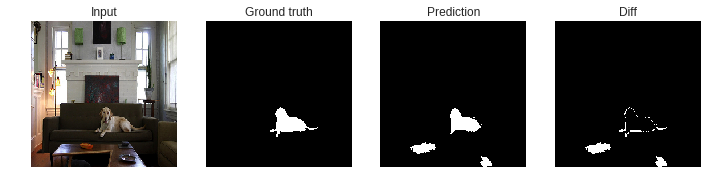

In [0]:
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(1, 4, 1)
ax1.imshow(x_valid[idx])
ax1.set_title('Input')
ax1.set_axis_off()

ax2 = fig.add_subplot(1, 4, 2)
ax2.imshow(np.squeeze(y_valid[idx]), cmap='gray')
ax2.set_title('Ground truth')
ax2.set_axis_off()

ax3 = fig.add_subplot(1, 4, 3)
ax3.imshow(np.squeeze(y_valid_pred), cmap='gray')
ax3.set_title('Prediction')
ax3.set_axis_off()

ax4 = fig.add_subplot(1, 4, 4)
ax4.imshow(np.abs(np.squeeze(y_valid[idx])-np.squeeze(y_valid_pred)), cmap='gray')
ax4.set_title('Diff')
ax4.set_axis_off()

plt.show()

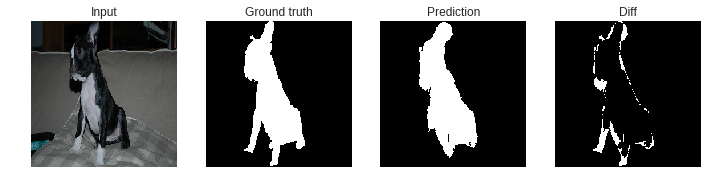

In [0]:
idx = np.random.randint(len(x_train))

y_train_prob = model.predict(x_train[idx:idx+1])
y_train_pred = (y_train_prob > 0.5).astype(np.int)

fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(1, 4, 1)
ax1.imshow(x_train[idx])
ax1.set_title('Input')
ax1.set_axis_off()

ax2 = fig.add_subplot(1, 4, 2)
ax2.imshow(np.squeeze(y_train[idx]), cmap='gray')
ax2.set_title('Ground truth')
ax2.set_axis_off()

ax3 = fig.add_subplot(1, 4, 3)
ax3.imshow(np.squeeze(y_train_pred), cmap='gray')
ax3.set_title('Prediction')
ax3.set_axis_off()

ax4 = fig.add_subplot(1, 4, 4)
ax4.imshow(np.abs(np.squeeze(y_train[idx])-np.squeeze(y_train_pred)), cmap='gray')
ax4.set_title('Diff')
ax4.set_axis_off()

plt.show()

Index color

In [0]:
def cast_to_pil(ndarray, palette, index_void=None):
        assert len(ndarray.shape) == 3
        res = np.argmax(ndarray, axis=2)
        if index_void is not None:
            res = np.where(res == index_void, 0, res)
        image = Image.fromarray(np.uint8(res), mode="P")
        image.putpalette(palette)
        return image

shape:  (256, 256, 3)


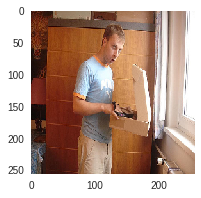

In [0]:
idx = np.random.randint(len(df_train))

file_name = df_train['A'][idx]
#file_name = '2008_003480'

size = 256

img_pil = Image.open(path_img+file_name+'.jpg').resize((size, size))
img_np = np.array(img_pil)

print ('shape: ', img_np.shape)

plt.figure(figsize=(5, 3))
plt.imshow(img_np)
plt.grid(False)
plt.show()

mode of class_pil:  P
mode of class_pil_rgb:  RGB
shape:  (256, 256)
shape:  (256, 256, 3)


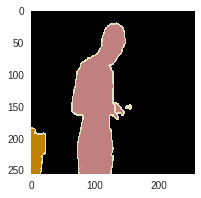

In [0]:
class_pil = Image.open(path_class+file_name+'.png').resize((size, size))
print ('mode of class_pil: ', class_pil.mode)

class_pil_rgb = class_pil.convert('RGB')
print ('mode of class_pil_rgb: ', class_pil_rgb.mode)

class_np = np.array(class_pil)
print ('shape: ', class_np.shape)

class_np_rgb = np.array(class_pil_rgb)
print ('shape: ', class_np_rgb.shape)

plt.figure(figsize=(5, 3))
plt.imshow(class_np_rgb)
plt.grid(False)
plt.show()

In [0]:
palette = class_pil.getpalette()
print (palette[:9])

palette_np = np.array(palette).reshape(-1, 3)

print(palette_np.shape)  # (256, 3)

print (palette_np[:5])

[0, 0, 0, 128, 0, 0, 0, 128, 0]
(256, 3)
[[  0   0   0]
 [128   0   0]
 [  0 128   0]
 [128 128   0]
 [  0   0 128]]


(256, 256)
P


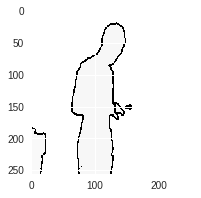

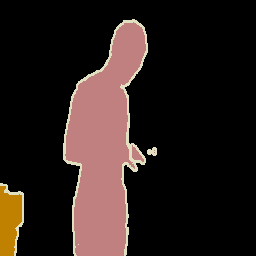

In [0]:
print (class_np.shape)

image = Image.fromarray(np.uint8(class_np), mode='P')
image.putpalette(palette)

print (image.mode)

plt.figure(figsize=(5, 3))
plt.imshow(np.array(image))
plt.show()

image

Generator

In [0]:
def batch_iter(data, labels, batch_size, shuffle=True):
    num_batches_per_epoch = int((len(data) - 1) / batch_size) + 1

    def data_generator():
        data_size = len(data)
        while True:
            # Shuffle the data at each epoch
            if shuffle:
                shuffle_indices = np.random.permutation(np.arange(data_size))
                shuffled_data = data[shuffle_indices]
                shuffled_labels = labels[shuffle_indices]
            else:
                shuffled_data = data
                shuffled_labels = labels

            for batch_num in range(num_batches_per_epoch):
                start_index = batch_num * batch_size
                end_index = min((batch_num + 1) * batch_size, data_size)
                X = shuffled_data[start_index: end_index]
                y = shuffled_labels[start_index: end_index]
                yield X, y

    return num_batches_per_epoch, data_generator()

  
train_steps, train_batches = batch_iter(x_train, y_train, batch_size)
valid_steps, valid_batches = batch_iter(x_test, y_test, batch_size)

model.fit_generator(train_batches, train_steps,
                    epochs=1, 
                    validation_data=valid_batches,
                    validation_steps=valid_steps)

In [0]:
def generator_1():
  yield 1
  yield 2
  yield 3
  
gen = generator_1()

print (type(gen))

<class 'generator'>


In [0]:
#print (next(gen))
#print (next(gen))
#print (next(gen))

for i in gen:
  print (i)

1
2
3


In [0]:
def generator_2():
  n = 0
  while True:
    yield n
    n += 1
    
gen = generator_2()

print (type(gen))

<class 'generator'>


In [0]:
for i in range(3):
  print (next(gen))

0
1
2


In [0]:
def generator_3():
  for _ in range(3):
    yield 1
    
gen = generator_3()

print (type(gen))

<class 'generator'>


In [0]:
for i in gen:
  print (i)

1
1
1


In [321]:
mat = np.identity(3)
a = [1,1,1]
b = mat[a]
c = np.argmax(b, axis=-1)

print (c)

[1 1 1]


In [434]:
!pip show tensorflow

Name: tensorflow
Version: 1.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: gast, six, keras-preprocessing, tensorboard, termcolor, grpcio, wheel, keras-applications, absl-py, astor, numpy, protobuf
Required-by: stable-baselines, magenta, fancyimpute
